<a href="https://colab.research.google.com/github/CollinsRutto/Social-Media-Analysis-and-scrapping/blob/main/Word_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


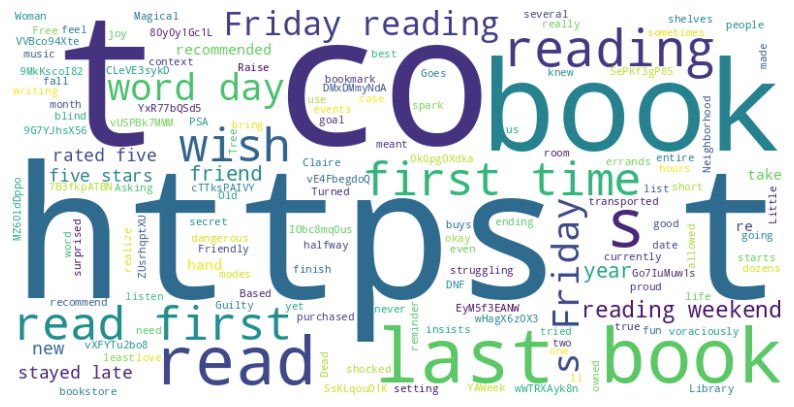

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import requests
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Specify the URL to fetch JSON data
url = "https://api.apify.com/v2/datasets/iVzjFjutm8FKIefpi/items?clean=true&format=json"

try:
    # Make an HTTP GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse JSON data from the response
        data = response.json()

        # Extract tweet texts
        tweet_texts = [tweet['full_text'] for tweet in data]

        # Combine all tweet texts into a single string
        combined_text = ' '.join(tweet_texts)

        # Tokenize the text
        tokens = word_tokenize(combined_text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word.lower() not in stop_words]

        # Create word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))

        # Display the word cloud
        plt.figure(figsize=(10, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()

    else:
        # Display an error message if the request was unsuccessful
        print(f"Error: HTTP status code {response.status_code} - {response.reason}")

except Exception as e:
    # Display an error message if any exception occurs
    print(f"Error fetching JSON data from URL: {e}")
